# I. How do the features of the dogs correlate to the number of tests completed? 

- Do we observe any significant difference from Dognition Personality Dimension? 
- How does Speed of Game Completion related to number of tests completed?
- Does different breed (group or type) complete tests differently? 
- Does dog with previous behavioral training get more tests completed? 

### Import all the necessary libraries:

In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import the dognition_data_aggregated_by_dogid dataset into pandas data frame:

In [11]:
df = pd.read_excel('data/dognition_data_aggregated_by_dogid.xlsx')

### Display the first five rows of data frame:

In [13]:
df.head()

,Dog ID,Total Tests Completed,Mean ITI (days),Mean ITI (minutes),Median ITI (days),Median ITI (minutes),Time diff between first and last game (days),Time diff between first and last game (minutes),User ID,Gender,...,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21,28.201076,40609.549167,0.004687,6.750000,564.021516,812190.983333,ce134e42-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Grand Forks,ND,58201,US,0,0,2015-03-12 00:25:00,2
1,fd27b5ba-7144-11e5-ba71-058fbc01cf0b,20,0.413307,595.162281,0.005845,8.416667,7.852836,11308.083333,ce1353d8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Barre,MA,01005,US,0,0,00:00:00,1
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.150000,0.009132,13.150000,0.009132,13.150000,ce135ab8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Darien,CT,06820,US,0,0,00:00:00,1
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11,56.115179,80805.858333,0.004433,6.383333,561.151794,808058.583333,ce13507c-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Winnetka,IL,60093,US,0,0,2014-09-12 19:26:00,1
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31,7.734254,11137.326111,0.000399,0.575000,232.027627,334119.783333,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Raleigh,NC,27606,US,1,0,00:00:00,2


### Display the shape of the data frame:

In [14]:
df.shape

(17986, 30)

### Show the columns of the data frame:

In [15]:
df.columns

Index(['Dog ID', 'Total Tests Completed', 'Mean ITI (days)',
       'Mean ITI (minutes)', 'Median ITI (days)', 'Median ITI (minutes)',
       'Time diff between first and last game (days)',
       'Time diff between first and last game (minutes)', 'User ID', 'Gender',
       'Birthday', 'Breed', 'Breed_Type', 'Breed_Group', 'Weight', 'Dog_Fixed',
       'DNA_Tested', 'Dimension', 'Sign_in_Count', 'Max_Dogs', 'Membership_ID',
       'Subscribed', 'City', 'State', 'Zip', 'Country', 'Exclude',
       'Free_Start_User', 'Last_Active_At', 'Membership_Type'],
      dtype='object')

### Display the general information about the data set:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17986 entries, 0 to 17985
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Dog ID                                           17986 non-null  object 
 1   Total Tests Completed                            17986 non-null  int64  
 2   Mean ITI (days)                                  16718 non-null  float64
 3   Mean ITI (minutes)                               16718 non-null  float64
 4   Median ITI (days)                                16718 non-null  float64
 5   Median ITI (minutes)                             16718 non-null  float64
 6   Time diff between first and last game (days)     17986 non-null  float64
 7   Time diff between first and last game (minutes)  17986 non-null  float64
 8   User ID                                          17985 non-null  object 
 9   Gender                      

### Display the data types of the columns:

In [17]:
df.dtypes

Dog ID                                              object
Total Tests Completed                                int64
Mean ITI (days)                                    float64
Mean ITI (minutes)                                 float64
Median ITI (days)                                  float64
Median ITI (minutes)                               float64
Time diff between first and last game (days)       float64
Time diff between first and last game (minutes)    float64
User ID                                             object
Gender                                              object
Birthday                                           float64
Breed                                               object
Breed_Type                                          object
Breed_Group                                         object
Weight                                             float64
Dog_Fixed                                          float64
DNA_Tested                                         float

### Check are there any missing values in the data frame:

In [18]:
df.isnull().any()

Dog ID                                             False
Total Tests Completed                              False
Mean ITI (days)                                     True
Mean ITI (minutes)                                  True
Median ITI (days)                                   True
Median ITI (minutes)                                True
Time diff between first and last game (days)       False
Time diff between first and last game (minutes)    False
User ID                                             True
Gender                                              True
Birthday                                            True
Breed                                               True
Breed_Type                                          True
Breed_Group                                         True
Weight                                              True
Dog_Fixed                                           True
DNA_Tested                                          True
Dimension                      

### Count  the missing values in the data frame:

In [19]:
df.isnull().sum()

Dog ID                                                0
Total Tests Completed                                 0
Mean ITI (days)                                    1268
Mean ITI (minutes)                                 1268
Median ITI (days)                                  1268
Median ITI (minutes)                               1268
Time diff between first and last game (days)          0
Time diff between first and last game (minutes)       0
User ID                                               1
Gender                                                1
Birthday                                              1
Breed                                                16
Breed_Type                                            1
Breed_Group                                           1
Weight                                                1
Dog_Fixed                                             1
DNA_Tested                                            1
Dimension                                       

# I. How do the features of the dogs correlated to the number of tests completed?

### Separate the Dog Features in a data frame df_DogFeats:

In [21]:
df_DogFeats = df.loc[:,['Dog ID','Total Tests Completed','Mean ITI (days)','Mean ITI (minutes)','Median ITI (days)','Median ITI (minutes)','Time diff between first and last game (days)','Time diff between first and last game (minutes)','Gender','Birthday','Breed','Breed_Type','Breed_Group','Weight','Dog_Fixed','DNA_Tested','Dimension',]]
df_DogFeats.head()

,Dog ID,Total Tests Completed,Mean ITI (days),Mean ITI (minutes),Median ITI (days),Median ITI (minutes),Time diff between first and last game (days),Time diff between first and last game (minutes),Gender,Birthday,Breed,Breed_Type,Breed_Group,Weight,Dog_Fixed,DNA_Tested,Dimension
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21,28.201076,40609.549167,0.004687,6.750000,564.021516,812190.983333,female,2011.0,Labrador Retriever,Pure Breed,Sporting,50.0,1.0,0.0,charmer
1,fd27b5ba-7144-11e5-ba71-058fbc01cf0b,20,0.413307,595.162281,0.005845,8.416667,7.852836,11308.083333,male,2007.0,Shetland Sheepdog,Pure Breed,Herding,20.0,1.0,0.0,protodog
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.150000,0.009132,13.150000,0.009132,13.150000,male,2012.0,Golden Retriever,Pure Breed,Sporting,70.0,0.0,1.0,0
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11,56.115179,80805.858333,0.004433,6.383333,561.151794,808058.583333,male,2011.0,Golden Retriever,Pure Breed,Sporting,70.0,0.0,0.0,0
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31,7.734254,11137.326111,0.000399,0.575000,232.027627,334119.783333,female,2010.0,Shih Tzu,Pure Breed,Toy,190.0,0.0,0.0,einstein


### Do we observe any significant difference from Dognition Personality Dimension?

In [22]:
# Replace 0 with 'ace'  in Dimension column
df_DogFeats['Dimension'].replace(0, 'ace', inplace = True)

In [23]:
# Fill the missing in Dimension column using mode method
df_DogFeats['Dimension'] = df_DogFeats['Dimension'].fillna(df_DogFeats['Dimension'].mode()[0])

In [24]:
# Find the sum of Total Tests Completed for each Dimension
Dimension_totalTests = df_DogFeats.groupby(['Dimension'])['Total Tests Completed'].sum()
Dimension_totalTests

Dimension
ace                96189
charmer            14884
einstein            2791
expert              6425
maverick            5769
protodog           13078
renaissance-dog    10922
socialite          18671
stargazer           7664
Name: Total Tests Completed, dtype: int64

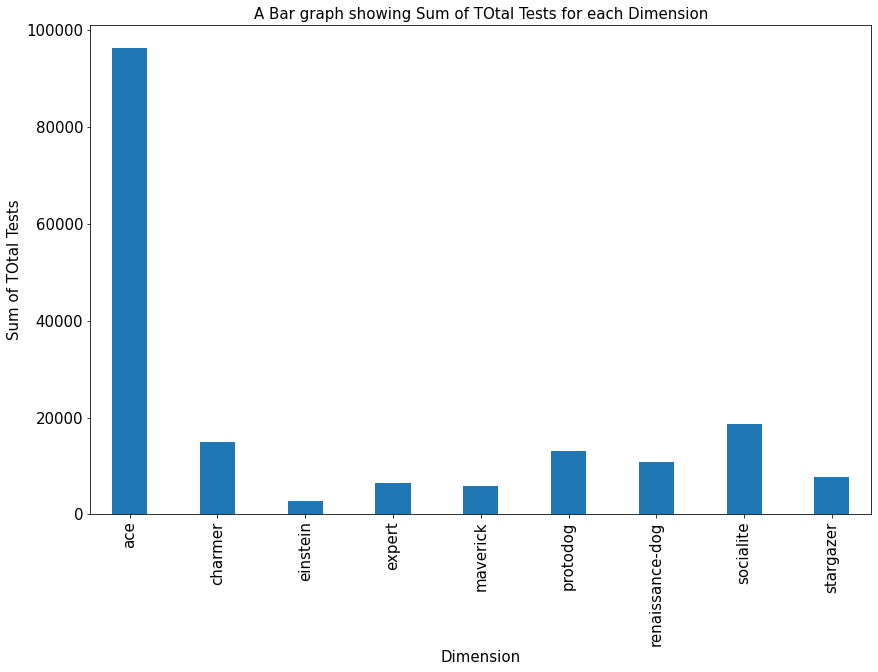

In [25]:
#A Bar graph showing Sum of Total Tests for each Dimension
ax = Dimension_totalTests.plot(kind='bar',figsize=(14,9), width=0.40 ,fontsize=15, )
ax.set_xlabel("Dimension",fontsize=15)  
ax.set_ylabel("Sum of TOtal Tests",fontsize=15)
ax.set_title('A Bar graph showing Sum of TOtal Tests for each Dimension',fontsize=15)
plt.show()

##### From the above bar graph we can observe  that Dognition Personality Dimension 'ace'   has the highest number of total tests passed.

### How does Speed of Game Completion related to number of tests completed?

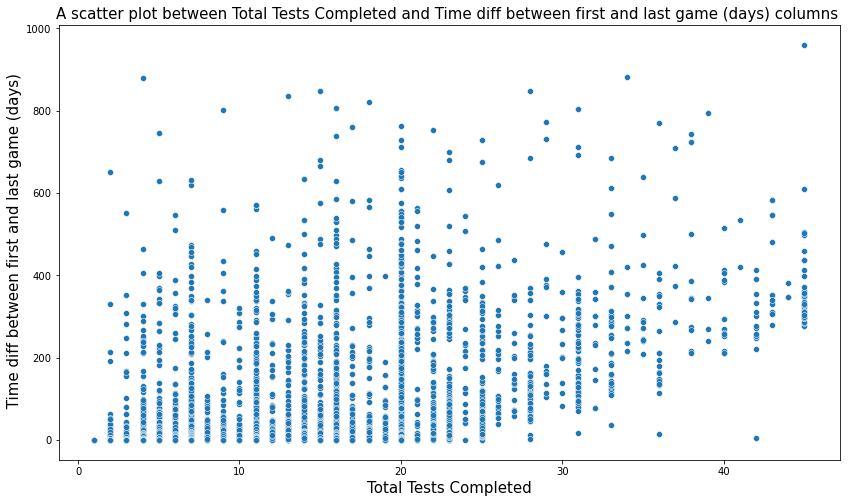

In [26]:
plt.figure(figsize = (14,8))
ax = sns.scatterplot(x= df_DogFeats['Total Tests Completed'] , y= df_DogFeats['Time diff between first and last game (days)'])
ax.set_xlabel("Total Tests Completed",fontsize=15)  
ax.set_ylabel(" Time diff between first and last game (days)",fontsize=15)
ax.set_title('A scatter plot between Total Tests Completed and Time diff between first and last game (days) columns ',fontsize=15)
plt.show()

#####  from the scatter plot above we see that  as Time diff between first and last game (days)  increases the total tests after 20 start decreasing. 

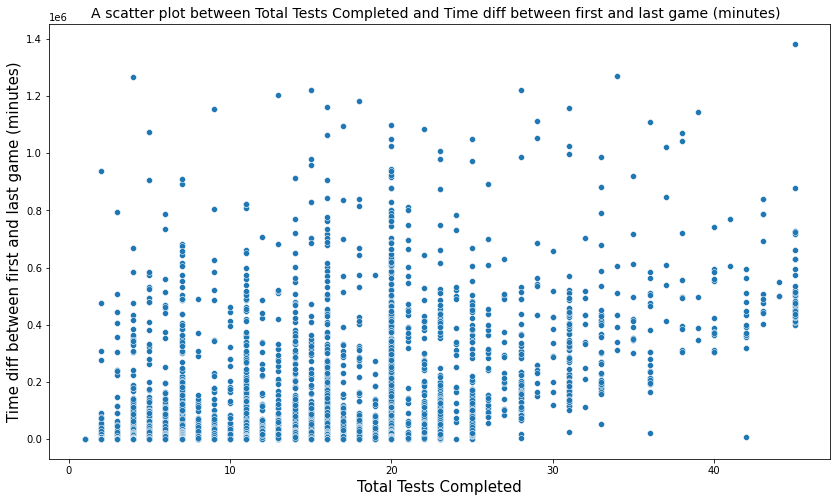

In [27]:
plt.figure(figsize = (14,8))
ax = sns.scatterplot(x= df_DogFeats['Total Tests Completed'] , y= df_DogFeats['Time diff between first and last game (minutes)'],)
ax.set_xlabel("Total Tests Completed",fontsize=15)  
ax.set_ylabel("Time diff between first and last game (minutes)",fontsize=15)
ax.set_title('A scatter plot between Total Tests Completed and Time diff between first and last game (minutes)  ',fontsize=14)
plt.show()

#####  from the scatter plot above we see that  as Time diff between first and last game (minutes)  increases the total tests after 20 start decreasing. 

### Does different breed (group or type) complete tests differently?

In [28]:
# Replace 0 with 'sporting' and also fill the null values
df_DogFeats['Breed_Group'].replace(0, 'Sporting', inplace = True)
df_DogFeats['Breed_Group'] = df_DogFeats['Breed_Group'].fillna(df_DogFeats['Breed_Group'].mode()[0])

In [29]:
# group the total test completed by Breed_Group
Breed_Group_totalTests = df_DogFeats.groupby(['Breed_Group'])['Total Tests Completed'].sum()
Breed_Group_totalTests

Breed_Group
Herding          20161
Hound             5419
Non-Sporting      9596
Sporting        114858
Terrier           7557
Toy              10097
Working           8705
Name: Total Tests Completed, dtype: int64

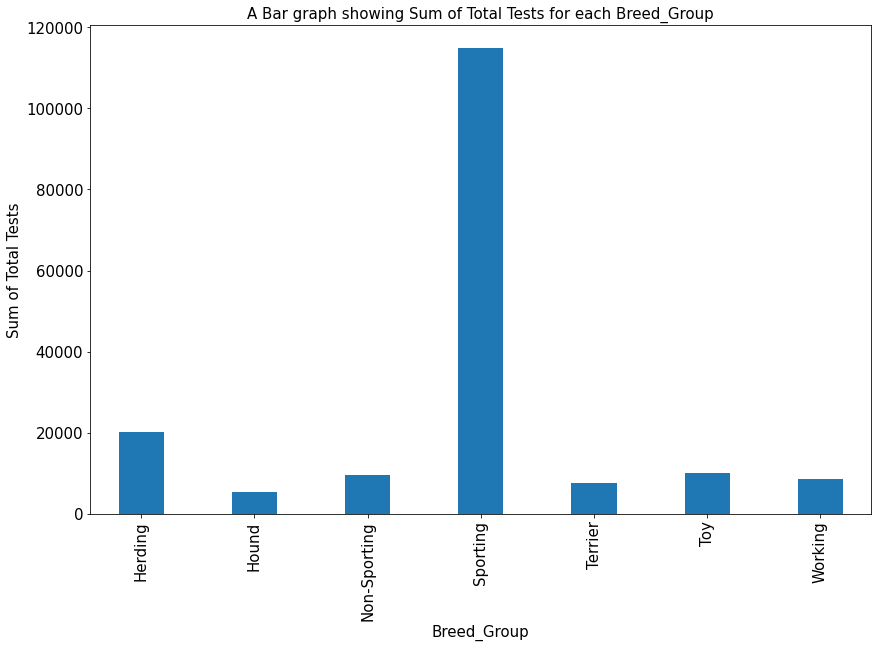

In [33]:
# A Bar graph showing Sum of Total Tests for each Breed_Group
ax = Breed_Group_totalTests.plot(kind='bar',figsize=(14,9), width=0.40 ,fontsize=15, )
ax.set_xlabel("Breed_Group",fontsize=15)  
ax.set_ylabel("Sum of Total Tests",fontsize=15)
ax.set_title('A Bar graph showing Sum of Total Tests for each Breed_Group',fontsize=15)
plt.show()

##### From the above bar graph we can clearly observe that Sporting breed group has completed the most test .

### Does dog with previous behavioral training get more tests completed?

In [34]:
# Create a new variable prev_training_done based on Sign_in_Count
df_DogFeats['prev_training_done'] = ''
for i in range(len(df_DogFeats)):
    if(df['Sign_in_Count'][i] == 1):
        df_DogFeats['prev_training_done'][i] = 'No'
    else:
        df_DogFeats['prev_training_done'][i] = 'Yes'      

/var/folders/2s/wjc24fvn7qz9cc22rvdgs6m00000gn/T/ipykernel_43476/2944919445.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DogFeats['prev_training_done'][i] = 'Yes'
/var/folders/2s/wjc24fvn7qz9cc22rvdgs6m00000gn/T/ipykernel_43476/2944919445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DogFeats['prev_training_done'][i] = 'No'


In [35]:
# group the total test completed by prev_training_done
prev_training_done_df = df_DogFeats.groupby(df_DogFeats['prev_training_done'])['Total Tests Completed'].sum()
prev_training_done_df

prev_training_done
No      20899
Yes    155494
Name: Total Tests Completed, dtype: int64

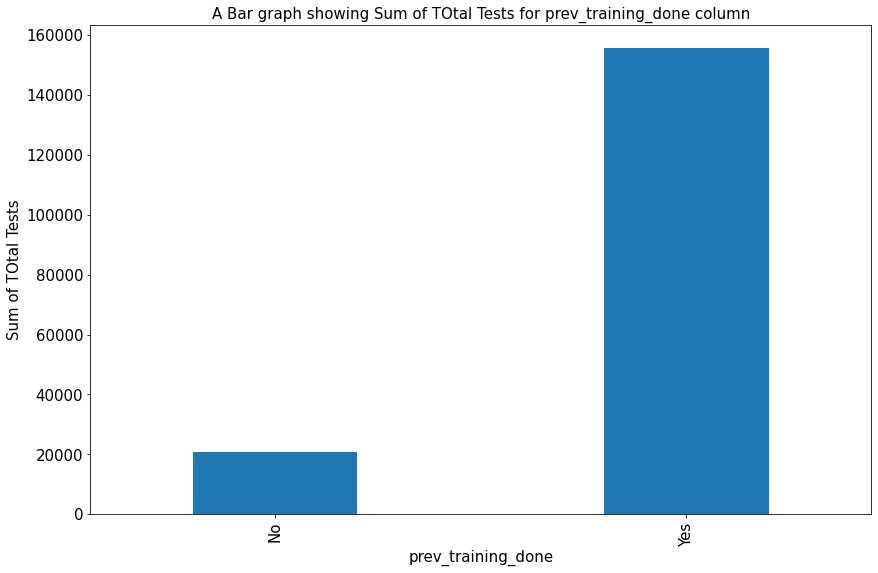

In [36]:
ax = prev_training_done_df.plot(kind='bar',figsize=(14,9), width=0.40 ,fontsize=15, )
ax.set_xlabel("prev_training_done",fontsize=15)  
ax.set_ylabel("Sum of TOtal Tests",fontsize=15)
ax.set_title('A Bar graph showing Sum of TOtal Tests for prev_training_done column',fontsize=15)
plt.show()

### From the bar lot above it can be observed that those dogs who has previous training they completed the most tests.